## 第109讲 YOLO (You Only Look Once) Object Detection


## Python学习：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

## Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

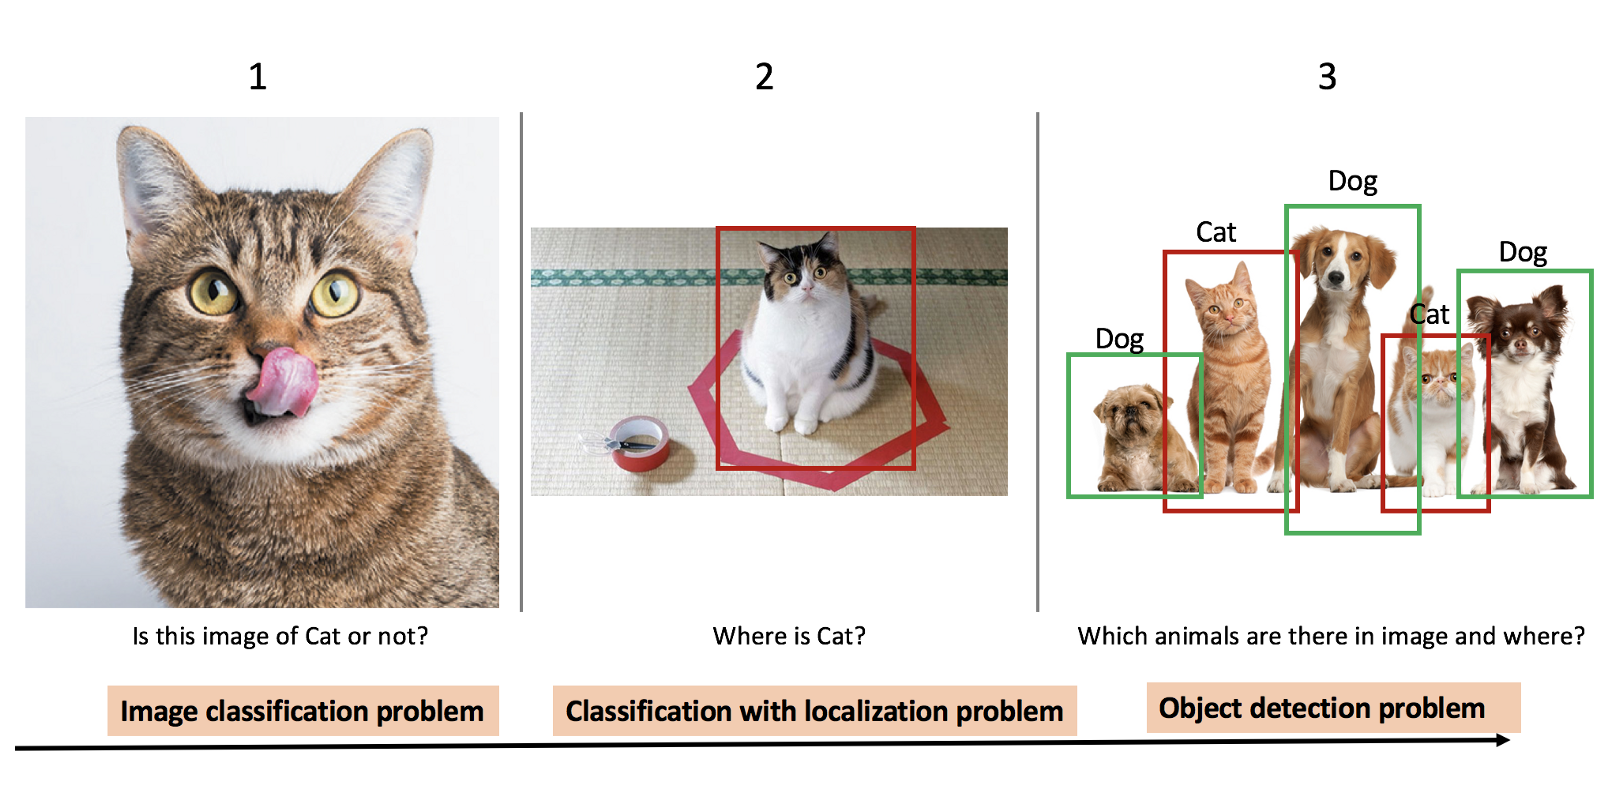

In [89]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson109-yolo\\2.png')

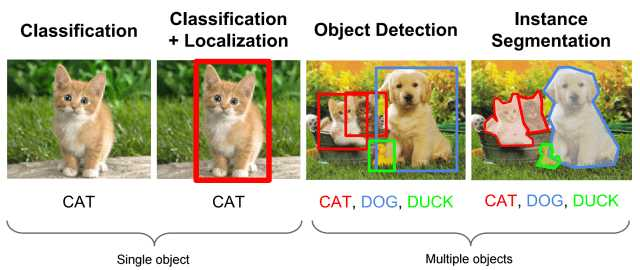

In [92]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson109-yolo\\1.jpg')

https://github.com/pjreddie/darknet/blob/master/data/coco.names

https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg

https://pjreddie.com/media/files/yolov3.weights

下载到目录：yolo-coco

https://cocodataset.org/#home

In [31]:
# importing the necessary packages
import numpy as np
import argparse
import time
import cv2
import os

# load the COCO class labels our YOLO model was trained on
labelsPath = 'yolo-coco\\coco.names'
LABELS = open(labelsPath).read().strip().split("\n")

# initialize a list of colors to represent each possible class label
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),dtype="uint8")

# paths to the YOLO weights and model configuration
weightsPath = 'yolo-coco\\yolov3.weights'
configPath = 'yolo-coco\\yolov3.cfg'

In [42]:
# load our YOLO object detector trained on COCO dataset (80 classes)
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

# load our input image and grab its spatial dimensions
#image = cv2.imread('D:\\python\\Project0-Python-MachineLearning\\Lesson109-yolo\\images\\1.jpg')
#image = cv2.imread('D:\\python\\Project0-Python-MachineLearning\\Lesson109-yolo\\images\\2.png')
#image = cv2.imread('D:\\python\\Project0-Python-MachineLearning\\Lesson109-yolo\\images\\3.jpg')
#image = cv2.imread('D:\\python\\Project0-Python-MachineLearning\\Lesson109-yolo\\images\\4.png')
#image = cv2.imread('D:\\python\\Project0-Python-MachineLearning\\Lesson109-yolo\\images\\5.jpg')
image = cv2.imread('D:\\python\\Project0-Python-MachineLearning\\Lesson109-yolo\\images\\6.png')
(H, W) = image.shape[:2]

# determine only the *output* layer names that we need from YOLO
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# construct a blob from the input image and then perform a forward
# pass of the YOLO object detector, giving us our bounding boxes and
# associated probabilities
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
	swapRB=True, crop=False)
net.setInput(blob)
layerOutputs = net.forward(ln)

# initialize our lists of detected bounding boxes, confidences, and
# class IDs, respectively
boxes = []
confidences = []
classIDs = []

In [43]:
# loop over each of the layer outputs
for output in layerOutputs:
	# loop over each of the detections
	for detection in output:
		# extract the class ID and confidence (i.e., probability) of
		# the current object detection
		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]

		# filter out weak predictions by ensuring the detected
		# probability is greater than the minimum probability
		#if confidence > args["confidence"]:
			# scale the bounding box coordinates back relative to the
			# size of the image, keeping in mind that YOLO actually
			# returns the center (x, y)-coordinates of the bounding
			# box followed by the boxes' width and height
		box = detection[0:4] * np.array([W, H, W, H])
		(centerX, centerY, width, height) = box.astype("int")

			# use the center (x, y)-coordinates to derive the top and
			# and left corner of the bounding box
		x = int(centerX - (width / 2))
		y = int(centerY - (height / 2))

			# update our list of bounding box coordinates, confidences,
			# and class IDs
		boxes.append([x, y, int(width), int(height)])
		confidences.append(float(confidence))
		classIDs.append(classID)

# apply non-maxima suppression to suppress weak, overlapping bounding boxes
idxs = cv2.dnn.NMSBoxes(boxes, confidences,0.5, 0.3)
                                                
# ensure at least one detection exists
if len(idxs) > 0:
	# loop over the indexes we are keeping
	for i in idxs.flatten():
		# extract the bounding box coordinates
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])

		# draw a bounding box rectangle and label on the image
		color = [int(c) for c in COLORS[classIDs[i]]]
		cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
		cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, color, 2)

# show the output image
cv2.imshow("Image", image)
cv2.waitKey(0)

# do a bit of cleanup
cv2.destroyAllWindows()